In [ ]:
#RONALDO RAFAEL ARIAS PARADA-1151674

In [1]:
# importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
 #Importar el data set
dataset = pd.read_csv('Advertising.csv')
dataset.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [8]:
#ver la información contenida en el data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
#Dimensiones de dataframe
dataset.shape

(200, 5)

In [10]:
#mostrar los tipos de datos del df
dataset.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [11]:
#verificar si existen datos nulos en el dataset
dataset.isnull().sum()*100/dataset.shape[0]

#No hay ningun valor nulo en el df

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

In [12]:
#estadisticas del dataframe.
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


array([[<AxesSubplot:title={'center':'TV'}>]], dtype=object)

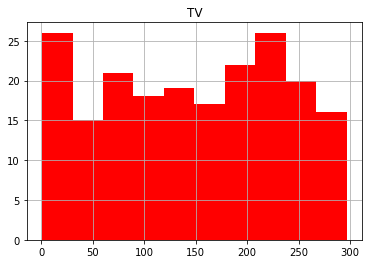

In [13]:
#histograma de los datos del data set
#histograma TV
dataset.hist('TV', color='red')

array([[<AxesSubplot:title={'center':'Radio'}>]], dtype=object)

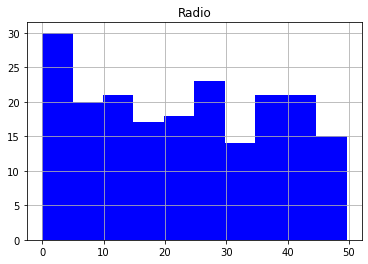

In [14]:
#histograma Radio
dataset.hist('Radio', color='blue')

array([[<AxesSubplot:title={'center':'Newspaper'}>]], dtype=object)

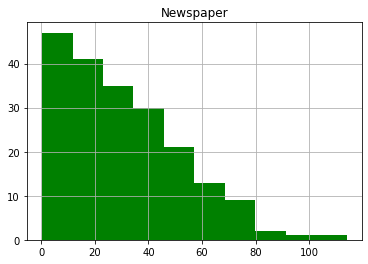

In [15]:
#histograma Newspaper
dataset.hist('Newspaper', color='green')

In [16]:
# Se crea un  nuevo dataframe con la data que sido escalada de manera estándar. 
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
scale  = pd.DataFrame(data=scale_X.fit_transform(dataset), columns=dataset.columns.values)

In [17]:
x= scale.iloc[:,:-1]
y= scale.iloc[:, 4]

In [18]:
x.head()

,Unnamed: 0,TV,Radio,Newspaper
0,-1.723412,0.969852,0.981522,1.778945
1,-1.706091,-1.197376,1.082808,0.669579
2,-1.688771,-1.516155,1.528463,1.783549
3,-1.671450,0.052050,1.217855,1.286405
4,-1.654129,0.394182,-0.841614,1.281802


In [19]:
y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: Sales, dtype: float64

In [20]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=4)

In [21]:
#conjunto de pruebas.(x)
X_test.head()

,Unnamed: 0,TV,Radio,Newspaper
11,-1.532884,0.790028,0.049697,-1.222329
99,-0.008660,-0.138283,1.244864,0.706404
128,0.493641,0.855419,1.737786,-1.259154
175,1.307715,1.516330,1.731034,0.517674
1,-1.706091,-1.197376,1.082808,0.669579


In [22]:
#conjunto de entrenamiento.(x)
X_train.head()

,Unnamed: 0,TV,Radio,Newspaper
26,-1.273073,-0.048371,0.407572,-0.826455
134,0.597565,-1.286120,1.035541,1.613231
180,1.394318,0.111602,-1.395307,-1.024392
158,1.013262,-1.580378,0.920751,0.674182
189,1.550205,-1.498640,-0.753833,-0.329312


In [23]:
#conjunto de pruebas.(y)
y_test.head()

11     0.648971
99     0.610541
128    2.051631
175    2.493565
1     -0.696046
Name: Sales, dtype: float64

In [24]:
#conjunto de entrenamiento.(y)
y_train.head()

26     0.187822
134   -0.619188
180   -0.676832
158   -1.291696
189   -1.406983
Name: Sales, dtype: float64

In [25]:
#Mostrando las dimensiones de los conjuntos ya divididos.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


In [26]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [27]:
rl.coef_

array([0.00098584, 0.76274219, 0.50568664, 0.00143348])

In [38]:
# Predecir el conjunto de test
y_pred= rl.predict(X_test)
y_pred[0:20]

array([ 0.62338247,  0.52396736,  1.52884768,  2.03288763, -0.36752343,
        1.3448717 , -0.74318126, -0.32122249, -0.44527959,  0.57761769,
        1.68114793,  0.25603024, -1.06391349,  0.17196372,  0.8841007 ,
        0.91654253,  0.9402691 ,  0.07602282, -0.83772022,  1.26467711])

In [39]:
y_test.head(20)

11     0.648971
99     0.610541
128    2.051631
175    2.493565
1     -0.696046
111    1.494410
90    -0.542330
177   -0.446257
88    -0.215683
187    0.629756
61     1.955558
199   -0.119610
191   -0.792119
123    0.226251
184    0.687400
188    0.360753
33     0.648971
171    0.091749
138   -0.849762
84     1.475195
Name: Sales, dtype: float64

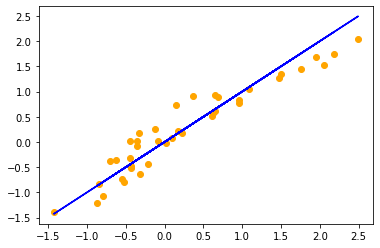

In [41]:
#grafica de la predicción de y versus la y real tanto de pruebas como de entrenamiento.
plt.scatter(y_test, y_pred, color = "orange")
plt.plot(y_test,y_test,color= "blue")
plt.show()

In [35]:
# encontar el valor de r cuadrado
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9084934434517354

In [40]:
#Se realiza la predicción de ventas para los siguientes datos radio =26.8, televisión = 33 y periódicos= 19.3
rl.predict([[0,33,26.8,19.3]])

array([38.74948724])